In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


In [2]:
audio_path = "D://Dev//ML//workspace//kaggle_challenges//BirdCLEF_CHALLENGE//data//train_audio//555086//XC928837.ogg"


In [3]:
import soundfile as sf
y, sr = sf.read(audio_path)


In [4]:
y, sr = librosa.load(audio_path, sr=None)  # y is amplitude, sr is sample rate
duration = len(y) / sr
time = np.linspace(0, duration, num=len(y))

In [5]:
duration

30.171

In [6]:
time

array([0.00000000e+00, 3.12500324e-05, 6.25000647e-05, ...,
       3.01709375e+01, 3.01709687e+01, 3.01710000e+01], shape=(965472,))

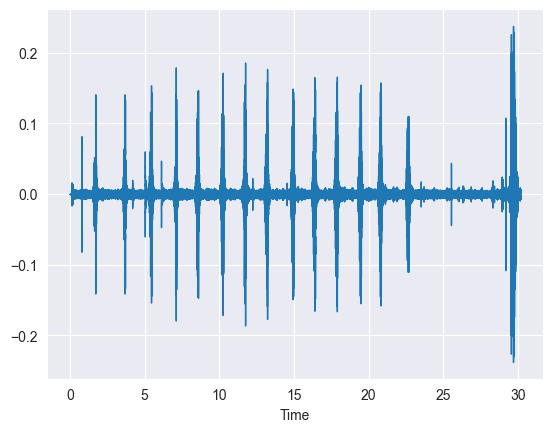

In [7]:
librosa.display.waveshow(y, sr=sr)


In [8]:
ftf = librosa.stft(y)  # Get complex frequency representation
ftf_db = librosa.amplitude_to_db(np.abs(ftf), ref=np.max)


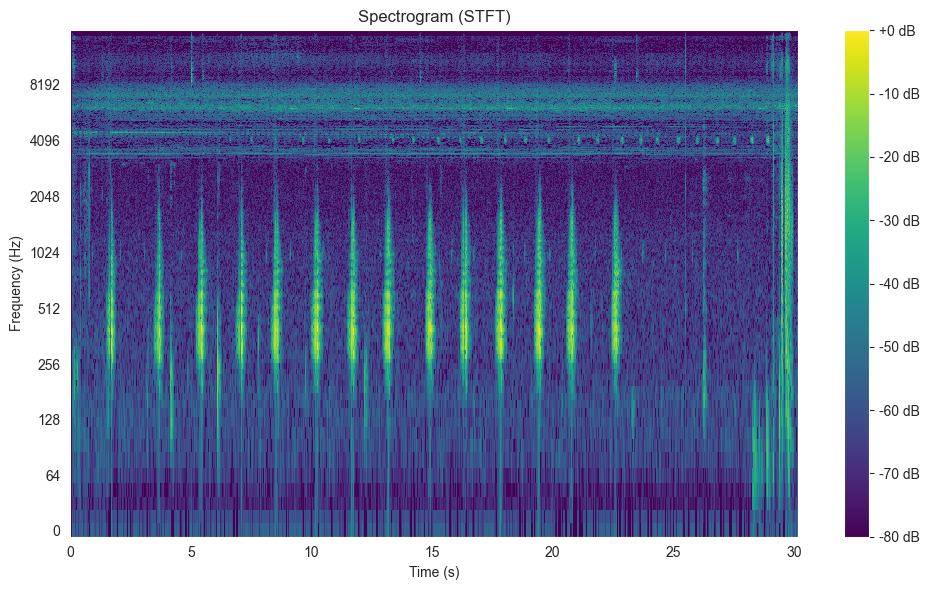

In [9]:
# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(ftf_db, sr=sr, x_axis="time", y_axis="log", cmap="viridis")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (STFT)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.tight_layout()
plt.show()

In [10]:
t=np.linspace(0, duration, num=len(y))  # Time vector based on the loaded audio
signal=y
fs=sr

In [11]:
sr

32000

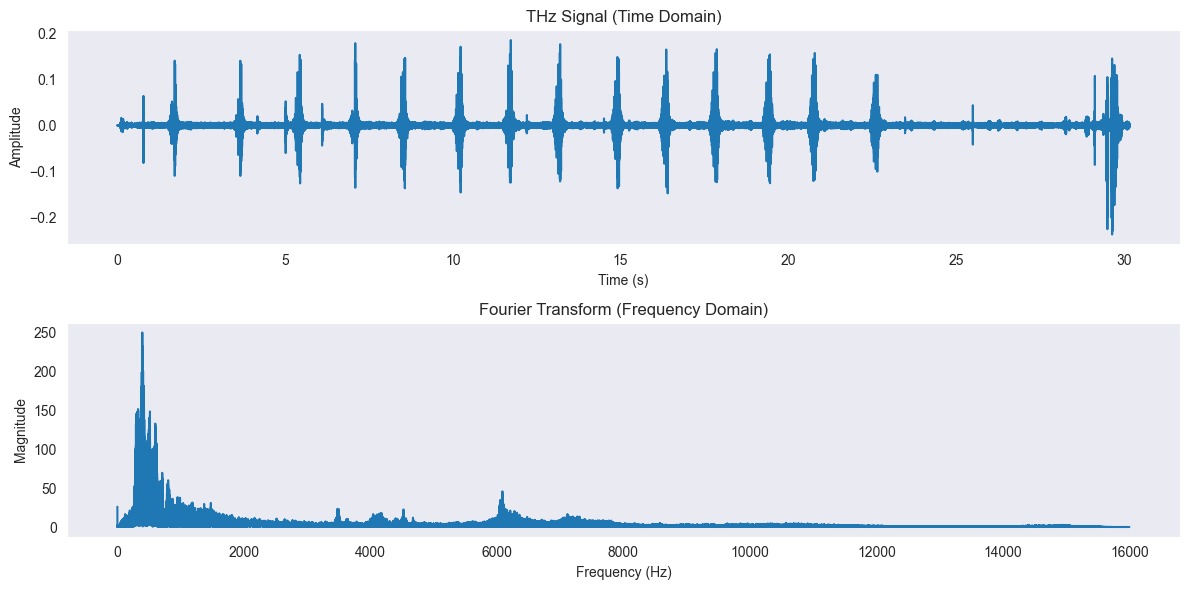

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# Compute the Fourier Transform
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), d=1/fs)

# Take the magnitude of the FFT
magnitude = np.abs(fft_result)

# Plot the THz signal
plt.figure(figsize=(12, 6))

# Time-domain plot
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("THz Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Frequency-domain plot
plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])  # Positive frequencies
plt.title("Fourier Transform (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()

In [13]:
 magnitude[482735]

np.float32(0.00061088265)

In [14]:
len(magnitude)//2

482736

In [15]:
 magnitude[482737]

np.float32(0.00061088265)

## HILBERT TRANSFORM

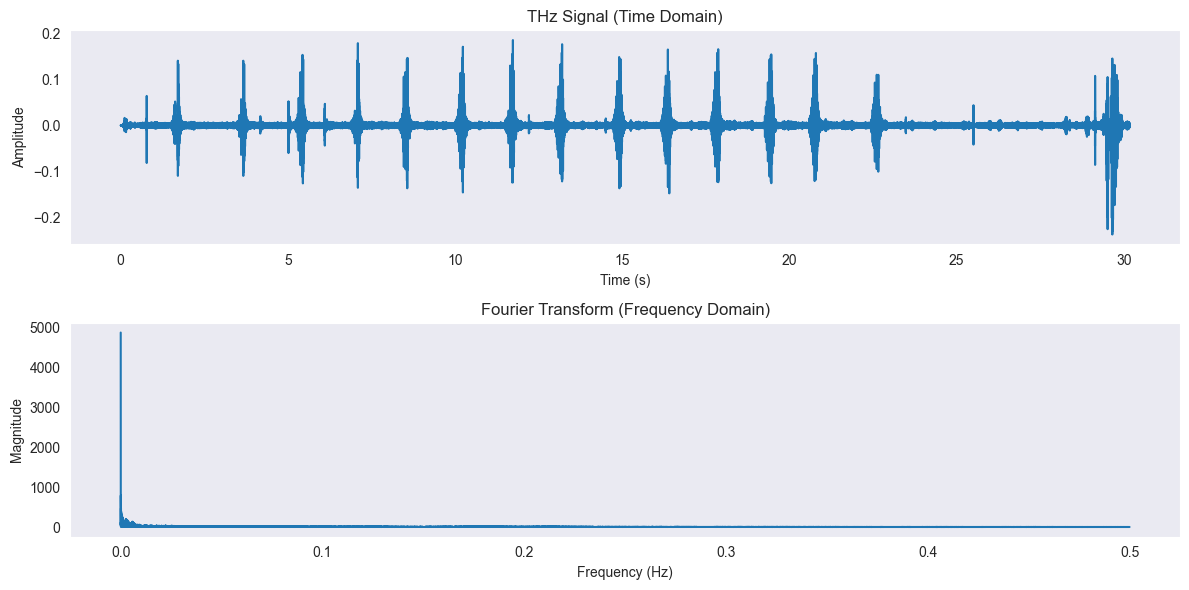

In [16]:
from scipy.signal import hilbert
import numpy as np

analytic_signal = hilbert(signal)
envelope = np.abs(analytic_signal)



# Compute the Fourier Transform
fft_result = np.fft.fft(envelope)
frequencies = np.fft.fftfreq(len(signal))

# Take the magnitude of the FFT
magnitude = np.abs(fft_result)

# Plot the THz signal
plt.figure(figsize=(12, 6))

# Time-domain plot
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("THz Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Frequency-domain plot
plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])  # Positive frequencies
plt.title("Fourier Transform (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()

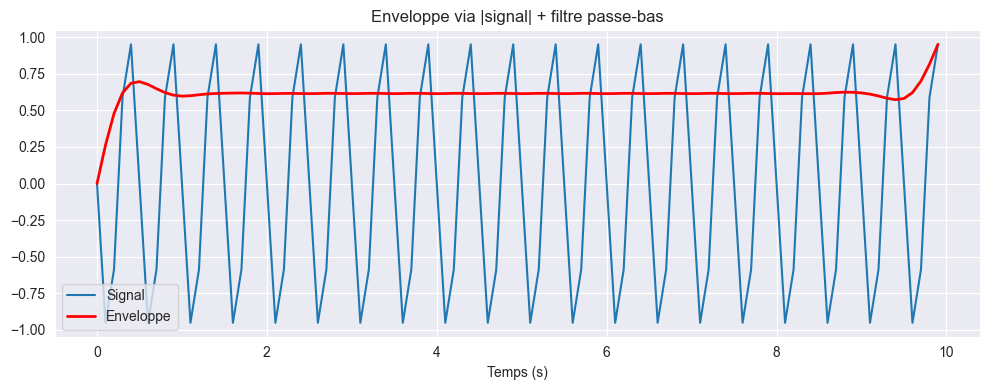

In [22]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Exemple : un signal modulé

# Étape 1 : prendre la valeur absolue
abs_signal = np.abs(signal)

# Étape 2 : appliquer un filtre passe-bas pour lisser l’enveloppe
def lowpass_filter(data, cutoff_freq, fs, order=3):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

envelope = lowpass_filter(abs_signal, cutoff_freq=10, fs=fs)

# Affichage
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label="Signal")
plt.plot(t, envelope, label="Enveloppe", color="red", linewidth=2)
plt.legend()
plt.title("Enveloppe via |signal| + filtre passe-bas")
plt.xlabel("Temps (s)")
plt.grid(True)
plt.tight_layout()
plt.show()


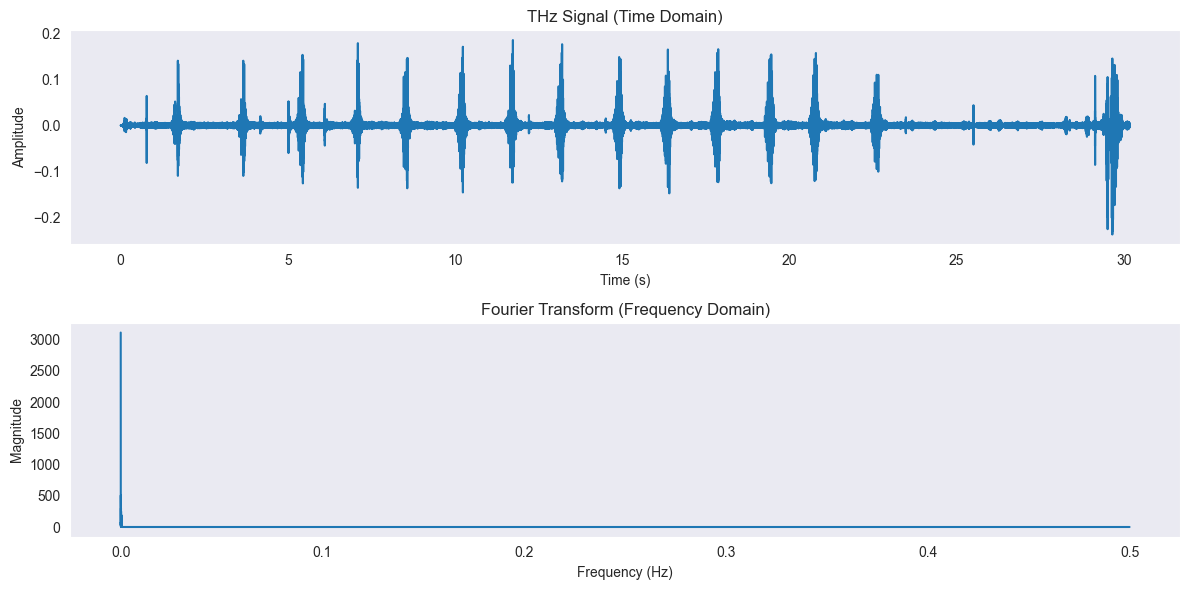

In [18]:
import numpy as np
import matplotlib.pyplot as plt


# Compute the Fourier Transform
fft_result = np.fft.fft(envelope)
frequencies = np.fft.fftfreq(len(signal))

# Take the magnitude of the FFT
magnitude = np.abs(fft_result)

# Plot the THz signal
plt.figure(figsize=(12, 6))

# Time-domain plot
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("THz Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Frequency-domain plot
plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])  # Positive frequencies
plt.title("Fourier Transform (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()

In [19]:
fft_result

array([3115.53048163  +0.j        , -444.79334998-121.03259052j,
         35.52550593-230.43134071j, ...,  237.89218121 -13.88786096j,
         35.52550593+230.43134071j, -444.79334998+121.03259052j],
      shape=(965472,))

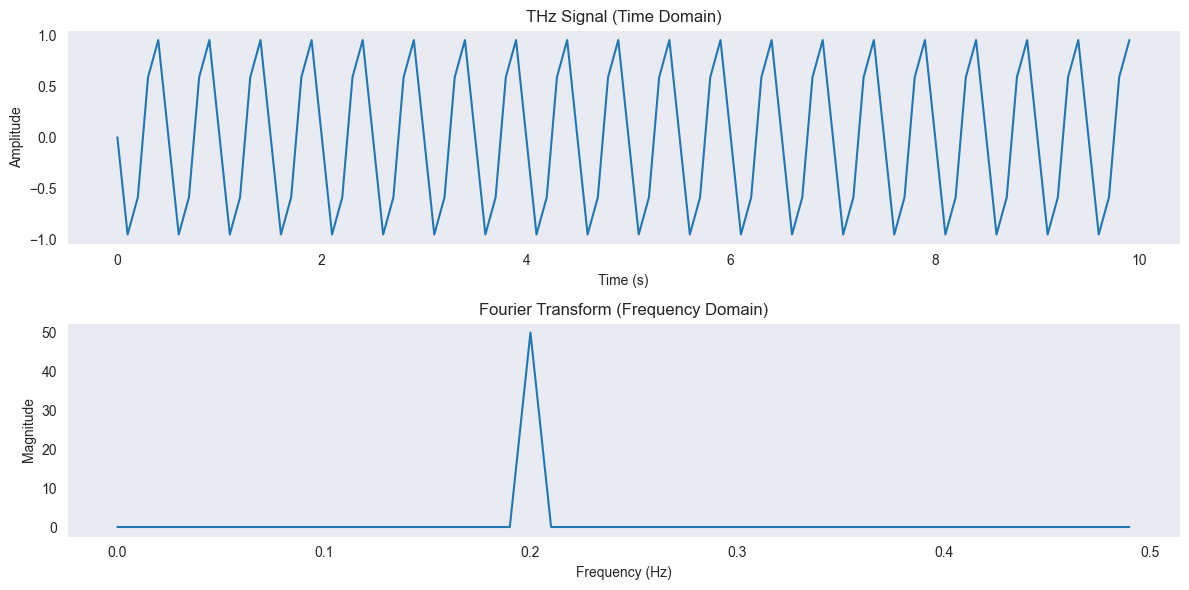

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Example THz signal (replace with your actual signal)
fs = 100  # Sampling rate in Hz (1 THz)
t = np.linspace(0,10, fs, endpoint=False)  # Time vector (1 ns duration)
signal = np.sin(2 * np.pi* 8  * t) + np.sin(2 * np.pi * 10  * t) # Example: 0.5 THz sine wave

# Compute the Fourier Transform
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal))

# Take the magnitude of the FFT
magnitude = np.abs(fft_result)

# Plot the THz signal
plt.figure(figsize=(12, 6))

# Time-domain plot
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("THz Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

# Frequency-domain plot
plt.subplot(2, 1, 2)
plt.plot(frequencies[:len(frequencies)//2], magnitude[:len(magnitude)//2])  # Positive frequencies
plt.title("Fourier Transform (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()